# Task 2.4 - Optimizing Hyperparameters - Random Forest 2010s

### Importing Libraries and Data

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [85]:
path = r'C:\Users\gre60\OneDrive\CareerFoundry Data Analytics Program\Machine Learning with Python'

In [87]:
# Import cleaned weather observations data

X = pd.read_csv(os.path.join(path, 'X_cleaned_date.csv'), index_col = False)

In [89]:
# Import predictions data

answers = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

In [91]:
X.head()

Unnamed: 0      DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  \
0           0  19600101      1                  7            0.85   
1           1  19600102      1                  6            0.84   
2           2  19600103      1                  8            0.90   
3           3  19600104      1                  3            0.92   
4           4  19600105      1                  6            0.95   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0           1.018                    0.32                 0.09   
1           1.018                    0.36                 1.05   
2           1.018                    0.18                 0.30   
3           1.018                    0.58                 0.00   
4           1.018                    0.65                 0.14   

   BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  \
0             0.7              6.5             0.8            10.9   
1             1.1              6.1             3.3            10.1   
2             0.0              8.5             5.1             9.9   
3             4.1              6.3             3.8            10.6   
4             5.4              3.0            -0.7             6.0   

   BELGRADE_cloud_cover  BELGRADE_humidity  BELGRADE_pressure  \
0                     1               0.81             1.0195   
1                     6               0.84             1.0172   
2                     6               0.77             1.0179   
3                     8               0.93             1.0268   
4                     8               0.99             1.0286   

   BELGRADE_global_radiation  BELGRADE_precipitation  BELGRADE_sunshine  \
0                       0.88                    0.00                7.0   
1                       0.25                    0.00                0.0   
2                       0.67                    0.00                3.5   
3                       0.25                    0.00                0.0   
4                       0.25                    0.06                0.0   

   BELGRADE_temp_mean  BELGRADE_temp_min  BELGRADE_temp_max  \
0                 3.7               -0.9                7.9   
1                 2.9                2.2                4.4   
2                 3.1               -0.5                6.4   
3                 2.0               -2.0                3.0   
4                 2.0                0.7                2.8   

   BUDAPEST_cloud_cover  BUDAPEST_humidity  BUDAPEST_pressure  \
0                     4               0.67              1.017   
1                     4               0.67              1.017   
2                     4               0.67              1.017   
3                     4               0.67              1.017   
4                     4               0.67              1.017   

   BUDAPEST_global_radiation  BUDAPEST_precipitation  BUDAPEST_sunshine  \
0                       0.44                    0.01                2.3   
1                       0.18                    0.31                0.0   
2                       0.30                    0.00                0.6   
3                       0.19                    0.00                0.0   
4                       0.19                    0.00                0.0   

   BUDAPEST_temp_mean  BUDAPEST_temp_min  BUDAPEST_temp_max  \
0                 2.4               -0.4                5.1   
1                 2.3                1.4                3.1   
2                 2.7                1.7                5.3   
3                 2.0                0.4                4.4   
4                 2.5                1.1                5.3   

   DEBILT_cloud_cover  DEBILT_humidity  DEBILT_pressure  \
0                   7             0.85           1.0032   
1                   8             0.90           1.0056   
2                   6             0.92           1.0165   
3                   8             0.95           1.0265   
4                   6            

In [93]:
X = X.drop('Unnamed: 0', axis=1)

In [95]:
X.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0  19600101      1                  7            0.85           1.018   
1  19600102      1                  6            0.84           1.018   
2  19600103      1                  8            0.90           1.018   
3  19600104      1                  3            0.92           1.018   
4  19600105      1                  6            0.95           1.018   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.32                 0.09             0.7   
1                    0.36                 1.05             1.1   
2                    0.18                 0.30             0.0   
3                    0.58                 0.00             4.1   
4                    0.65                 0.14             5.4   

   BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
0              6.5             0.8            10.9                     1   
1              6.1             3.3            10.1                     6   
2              8.5             5.1             9.9                     6   
3              6.3             3.8            10.6                     8   
4              3.0            -0.7             6.0                     8   

   BELGRADE_humidity  BELGRADE_pressure  BELGRADE_global_radiation  \
0               0.81             1.0195                       0.88   
1               0.84             1.0172                       0.25   
2               0.77             1.0179                       0.67   
3               0.93             1.0268                       0.25   
4               0.99             1.0286                       0.25   

   BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
0                    0.00                7.0                 3.7   
1                    0.00                0.0                 2.9   
2                    0.00                3.5                 3.1   
3                    0.00                0.0                 2.0   
4                    0.06                0.0                 2.0   

   BELGRADE_temp_min  BELGRADE_temp_max  BUDAPEST_cloud_cover  \
0               -0.9                7.9                     4   
1                2.2                4.4                     4   
2               -0.5                6.4                     4   
3               -2.0                3.0                     4   
4                0.7                2.8                     4   

   BUDAPEST_humidity  BUDAPEST_pressure  BUDAPEST_global_radiation  \
0               0.67              1.017                       0.44   
1               0.67              1.017                       0.18   
2               0.67              1.017                       0.30   
3               0.67              1.017                       0.19   
4               0.67              1.017                       0.19   

   BUDAPEST_precipitation  BUDAPEST_sunshine  BUDAPEST_temp_mean  \
0                    0.01                2.3                 2.4   
1                    0.31                0.0                 2.3   
2                    0.00                0.6                 2.7   
3                    0.00                0.0                 2.0   
4                    0.00                0.0                 2.5   

   BUDAPEST_temp_min  BUDAPEST_temp_max  DEBILT_cloud_cover  DEBILT_humidity  \
0               -0.4                5.1                   7             0.85   
1                1.4                3.1                   8             0.90   
2                1.7                5.3                   6             0.92   
3                0.4                4.4                   8             0.95   
4                1.1                5.3                   6             0.90   

   DEBILT_pressure  DEBILT_global_radiation  DEBILT_precipitation  \
0           1.0032                     0.07                  0.25   
1           1.0056                     0.14 

In [97]:
X.shape

(22950, 137)

In [99]:
answers.head()

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0  19600101                       0                          0   
1  19600102                       0                          0   
2  19600103                       0                          0   
3  19600104                       0                          0   
4  19600105                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

### Data Wrangling

In [102]:
# Reduce observations dataset to 2010's

dfdecade = X[(X['DATE'].astype(str).str[:4] >= '2010') & (X['DATE'].astype(str).str[:4] <= '2019')]
dfdecade

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
18263  20100101      1                  8            0.93          0.9965   
18264  20100102      1                  3            0.74          1.0193   
18265  20100103      1                  3            0.75          1.0226   
18266  20100104      1                  5            0.83          1.0169   
18267  20100105      1                  7            0.78          1.0073   
...         ...    ...                ...             ...             ...   
21910  20191227     12                  8            0.92          1.0273   
21911  20191228     12                  7            0.86          1.0380   
21912  20191229     12                  6            0.93          1.0387   
21913  20191230     12                  1            0.81          1.0354   
21914  20191231     12                  5            0.87          1.0350   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
18263                    0.18                 0.56             0.0   
18264                    0.58                 0.00             5.2   
18265                    0.61                 0.00             6.3   
18266                    0.48                 0.00             3.7   
18267                    0.53                 0.04             4.4   
...                       ...                  ...             ...   
21910                    0.15                 0.52             0.1   
21911                    0.35                 0.00             1.3   
21912                    0.61                 0.00             4.9   
21913                    0.64                 0.00             6.5   
21914                    0.58                 0.00             3.5   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
18263              2.9            -0.2             4.8                     6   
18264             -1.5            -4.2             0.4                     8   
18265             -3.2            -6.0             1.1                     7   
18266             -4.9            -8.3            -3.1                     2   
18267             -4.0            -7.1            -1.5                     6   
...                ...             ...             ...                   ...   
21910              6.8             5.6             7.9                     5   
21911              3.7            -0.6             5.7                     8   
21912             -0.8            -2.7             2.6                     8   
21913              0.5            -3.0             5.1                     6   
21914              0.4            -1.3             3.5                     2   

       BELGRADE_humidity  BELGRADE_pressure  BELGRADE_global_radiation  \
18263               0.85             0.9912                       0.64   
18264               0.92             0.9995                       0.25   
18265               0.82             1.0156                       0.25   
18266               0.72             1.0211                       0.86   
18267               0.81             1.0111                       0.39   
...                  ...                ...                        ...   
21910               0.68             1.0231                       0.20   
21911               0.68             1.0269                       0.21   
21912               0.68             1.0327                       0.21   
21913               0.68             1.0381                       0.21   
21914               0.68             1.0324                       0.48   

       BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
18263                    2.63                3.2                 9.9   
18264                    0.74                0.0                 3.5   
18265                    0.12                0.0                -0.6   
18266                    0.00                6.4                 0.0   
18267                    1.20      

In [104]:
# Reduce answers dataset to 2010's

answers_decade = answers[(answers['DATE'].astype(str).str[:4] >= '2010') & (answers['DATE'].astype(str).str[:4] <= '2019')]
answers_decade

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
18263  20100101                       0                          0   
18264  20100102                       0                          0   
18265  20100103                       0                          0   
18266  20100104                       0                          0   
18267  20100105                       0                          0   
...         ...                     ...                        ...   
21910  20191227                       0                          0   
21911  20191228                       0                          0   
21912  20191229                       0                          0   
21913  20191230                       0                          0   
21914  20191231                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
18263                          0                        0   
18264                          0                        0   
18265                          0                        0   
18266                          0                        0   
18267                          0                        0   
...                          ...                      ...   
21910                          0                        0   
21911                          0                        0   
21912                          0                        0   
21913                          0                        0   
21914                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
18263                            0                          0   
18264                            0                          0   
18265                            0                          0   
18266                            0                          0   
18267                            0                          0   
...                            ...                        ...   
21910                            0                          0   
21911                            0                          0   
21912                            0                          0   
21913                            0                          0   
21914                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
18263                        0                           0   
18264                        0                           0   
18265                        0                           0   
18266                        0                           0   
18267                        0                           0   
...                        ...                         ...   
21910                        0                           0   
21911                        0                           0   
21912                        0                           0   
21913                        0                           0   
21914                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
18263                            0                        0   
18264                            0                        0   
18265                            0                        0   
18266                            0                        0   
18267                            0                        0   
...                            ...                      ...   
21910                            0                        0   
21911                            0                        0   
21912                            0                        0   
21913                            0                        0   
21914                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
18263                          0                      0   
18264                          0    

In [106]:
# Drop unnecessary columns

dfdecade.drop(['DATE', 'MONTH'], axis=1, inplace=True)

In [108]:
dfdecade.shape # observations dataset has the correct shape

(3652, 135)

In [110]:
answers_decade.drop(columns = 'DATE', inplace = True)

In [112]:
answers_decade.shape # predictions dataset has the correct shape

(3652, 15)

### Reshaping for Modeling

In [115]:
X = dfdecade

In [117]:
y = answers_decade

In [119]:
# Turn X and y from a df to arrays

X = np.array(X)
y = np.array(y)

In [121]:
X.shape

(3652, 135)

In [123]:
y.shape

(3652, 15)

### Data Split

In [126]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [128]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 135) (2739, 15)
(913, 135) (913, 15)


### Hyperparameter Optimization

#### Grid Search

In [132]:
# Create a RF classifier

clf = RandomForestClassifier()

In [134]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[15, 50, 100, 135], 
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [136]:
start = time.time()
grid = GridSearchCV(clf, param_grid=grid_space, cv=3, scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Search took 18.952865127722422 minutes


In [138]:
# Print grid search results

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best GRID search score is: 0.6447608616283315


### Random Search

In [141]:
# Define random search cv

rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(15, 135),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [143]:
# Create a RF classifier

clf2= RandomForestClassifier()

In [145]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=10, scoring='accuracy', verbose=3, n_jobs=-1, cv=3)
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Search took 9.87299704949061 minutes


In [146]:
# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 60, 'max_features': 95, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 210}
Best RANDOM search score is: 0.6374589266155531


In [149]:
# Grid search results vs.

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best GRID search score is: 0.6447608616283315
Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 60, 'max_features': 95, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 210}
Best RANDOM search score is: 0.6374589266155531


### Running Random Forest with Optimized Search Parameters

In [152]:
# Create a RF classifier with the best results from above
clf3 = RandomForestClassifier(n_estimators = 200, max_depth=None, max_features=50, min_samples_leaf=1, min_samples_split=2)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(max_features=50, n_estimators=200)

In [154]:
# Perform predictions on the test dataset
y_pred = clf3.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.6637458926615553


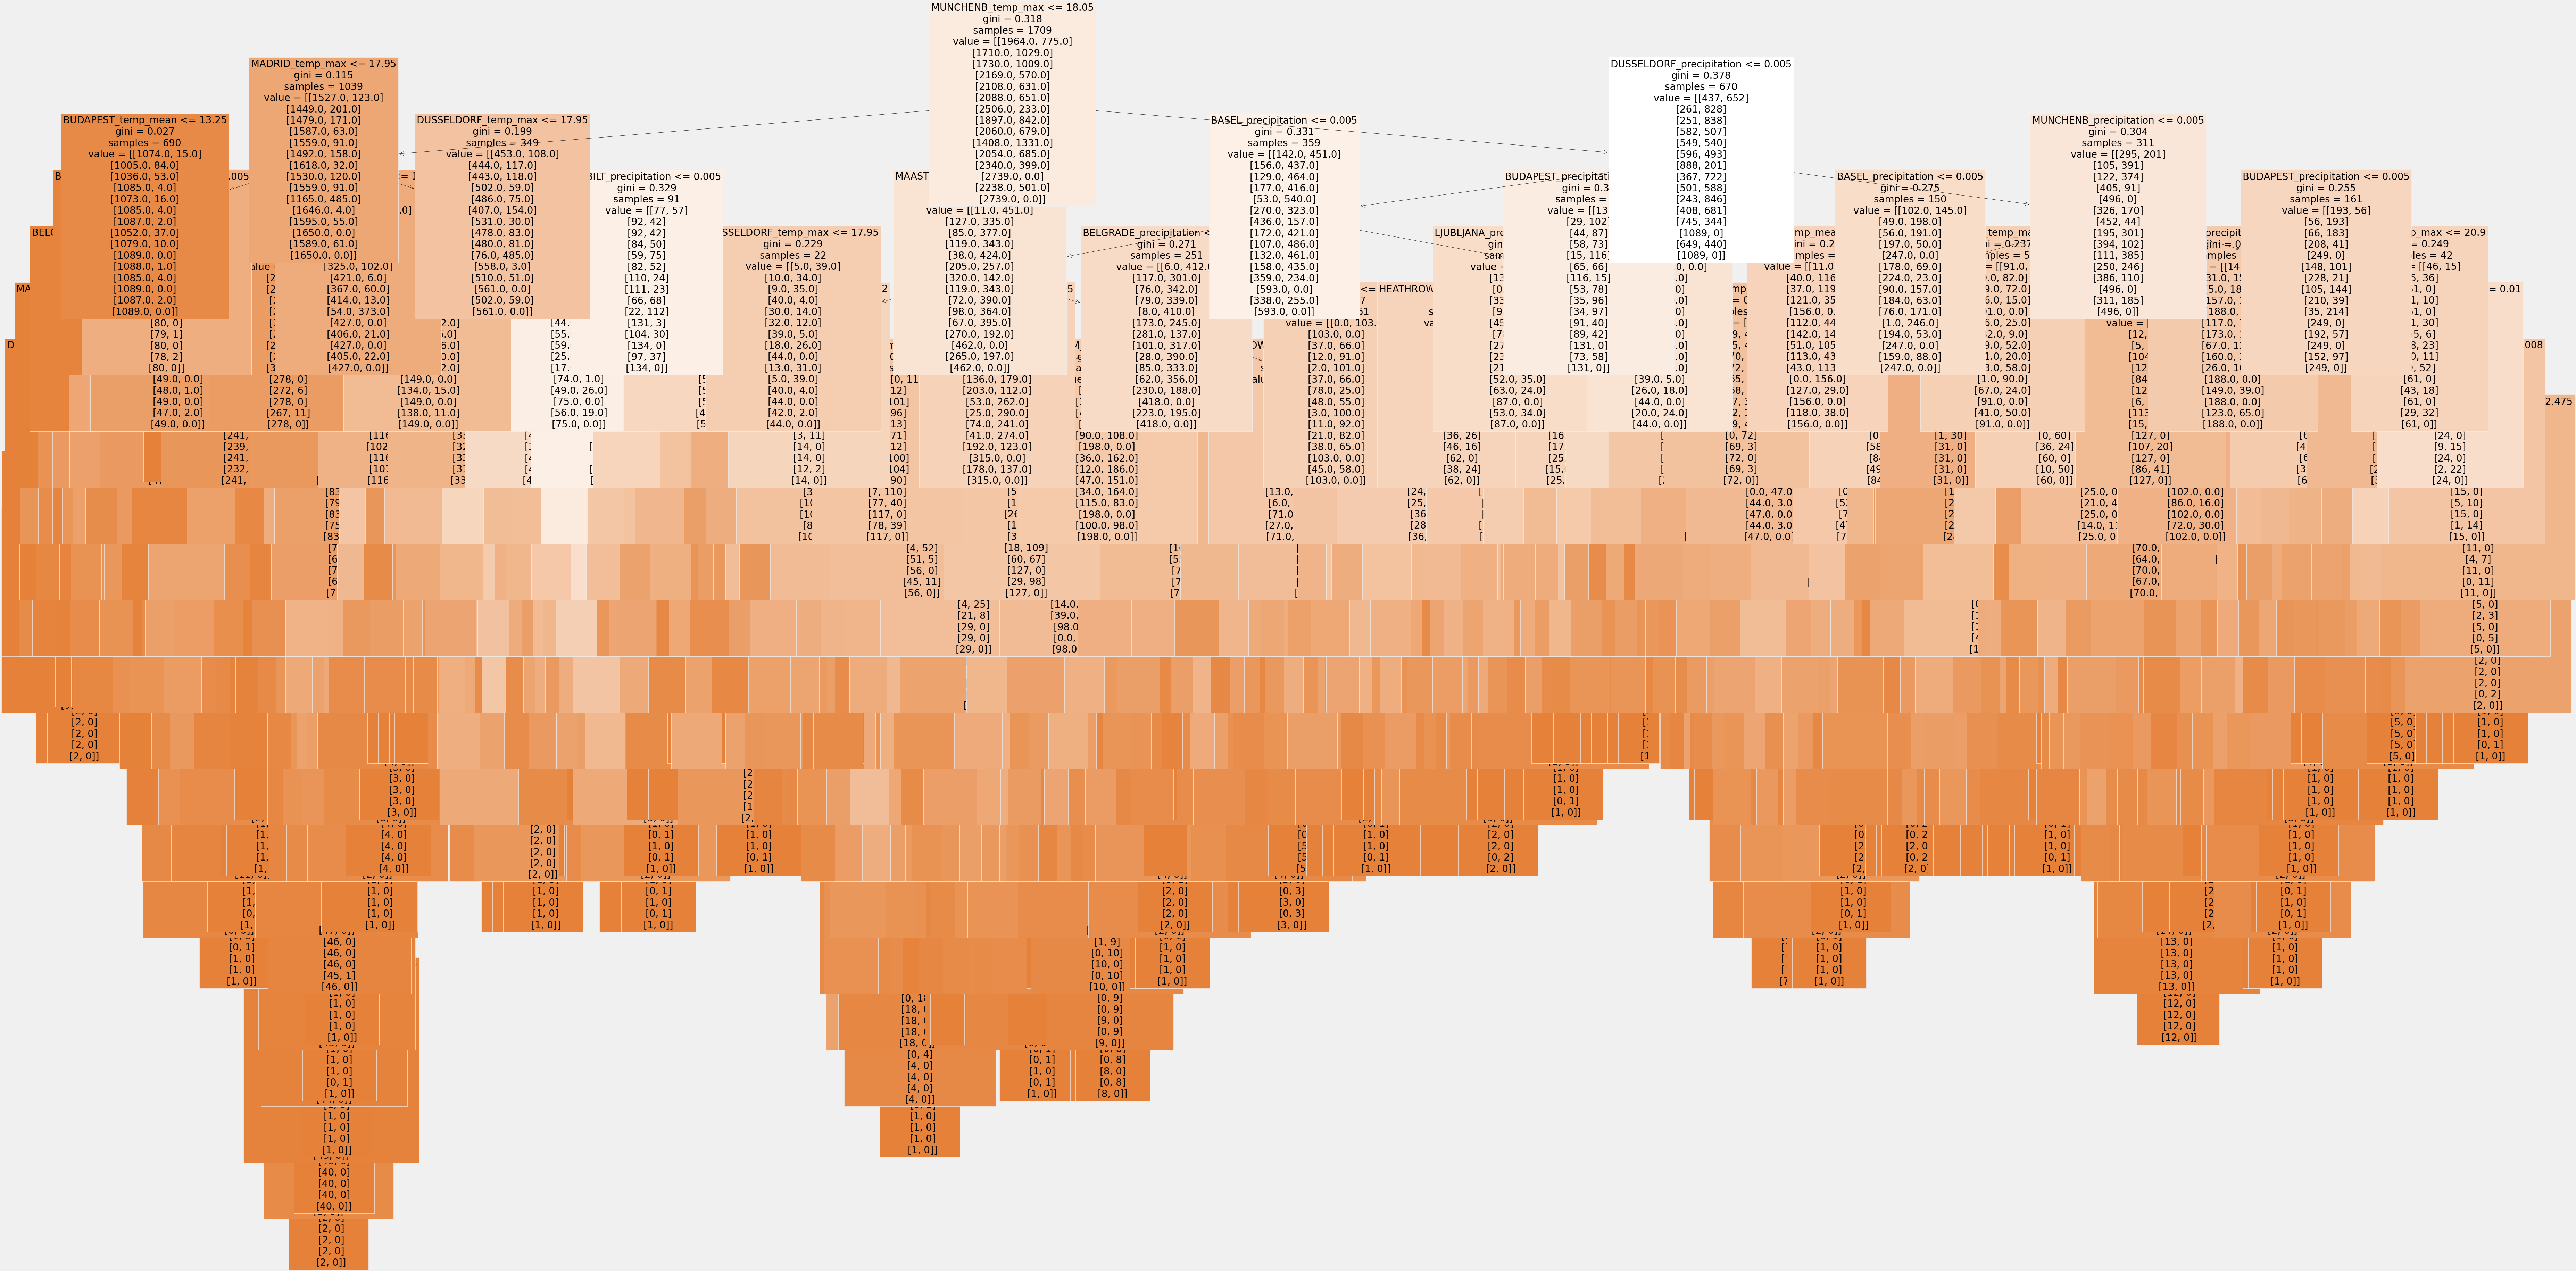

In [156]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[15], fontsize = 20, feature_names = dfdecade.columns, class_names=['unpleasant', 'pleasant'], filled=True);

In [158]:
fig.savefig(os.path.join(path, 'optimized_random_forest_2010s.png'),bbox_inches='tight')

### Uncovering Feature Importances

In [161]:
# Retrieve feature importances from the trained model

newarray = clf3.feature_importances_
print(clf3.feature_importances_.shape)
newarray

(135,)


array([1.52636347e-03, 2.37123704e-03, 1.92660895e-03, 2.26981209e-03,
       3.00573519e-02, 3.83848672e-03, 1.00754326e-02, 2.08976921e-03,
       7.39474414e-02, 3.00115833e-03, 2.38702082e-03, 2.45728852e-03,
       2.09350400e-03, 2.63702352e-02, 2.15728649e-03, 3.69511250e-03,
       2.00849390e-03, 8.38703366e-03, 3.13438114e-04, 0.00000000e+00,
       0.00000000e+00, 8.00360656e-04, 2.53638740e-02, 8.85101286e-04,
       7.58183649e-03, 2.25381129e-03, 1.94429626e-02, 1.38603568e-03,
       1.97952143e-03, 2.42741498e-03, 2.59464732e-03, 2.03945178e-02,
       2.84083769e-03, 2.46744121e-03, 2.20798817e-03, 3.29185069e-02,
       1.27170115e-03, 1.88925550e-03, 2.03440384e-03, 2.23889249e-03,
       3.72879839e-02, 2.53357526e-03, 8.15503271e-03, 1.94711639e-03,
       1.18230057e-01, 1.97178105e-03, 3.11134449e-03, 2.48696986e-03,
       3.26371144e-03, 1.36561201e-02, 3.72224662e-03, 2.72005641e-03,
       2.12518733e-03, 1.03752103e-02, 1.29792147e-03, 1.62323844e-03,
      

In [163]:
# Reshape newarray

newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[1.52636347e-03, 2.37123704e-03, 1.92660895e-03, 2.26981209e-03,
         3.00573519e-02, 3.83848672e-03, 1.00754326e-02, 2.08976921e-03,
         7.39474414e-02],
        [3.00115833e-03, 2.38702082e-03, 2.45728852e-03, 2.09350400e-03,
         2.63702352e-02, 2.15728649e-03, 3.69511250e-03, 2.00849390e-03,
         8.38703366e-03],
        [3.13438114e-04, 0.00000000e+00, 0.00000000e+00, 8.00360656e-04,
         2.53638740e-02, 8.85101286e-04, 7.58183649e-03, 2.25381129e-03,
         1.94429626e-02],
        [1.38603568e-03, 1.97952143e-03, 2.42741498e-03, 2.59464732e-03,
         2.03945178e-02, 2.84083769e-03, 2.46744121e-03, 2.20798817e-03,
         3.29185069e-02],
        [1.27170115e-03, 1.88925550e-03, 2.03440384e-03, 2.23889249e-03,
         3.72879839e-02, 2.53357526e-03, 8.15503271e-03, 1.94711639e-03,
         1.18230057e-01],
        [1.97178105e-03, 3.11134449e-03, 2.48696986e-03, 3.26371144e-03,
         1.36561201e-02, 3.72224662e-03, 2.72005641e-03, 2.12518733

In [165]:
# Collapse this shape into one observation for each weather station

sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.1281025 , 0.05255713, 0.05664138, 0.06921691, 0.17558802,
       0.04343263, 0.02569036, 0.07523646, 0.12676238, 0.07186324,
       0.07157401, 0.04369944, 0.0188318 , 0.03769045, 0.00311328])

In [167]:
# Extract stations list

stations = [col.split('_')[0] for col in dfdecade.columns if '_' in col]

In [169]:
# Create a set of unique station names

unique_stations = set(stations)
unique_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [171]:
# Convert the set of unique stations to a list

unique_stations_list = list(unique_stations)

In [173]:
important = pd.Series(sumarray, index = unique_stations_list)
important = important.sort_values(ascending = False)
important

STOCKHOLM     0.175588
MADRID        0.128103
BUDAPEST      0.126762
BELGRADE      0.075236
DEBILT        0.071863
LJUBLJANA     0.071574
OSLO          0.069217
MAASTRICHT    0.056641
BASEL         0.052557
SONNBLICK     0.043699
VALENTIA      0.043433
DUSSELDORF    0.037690
KASSEL        0.025690
MUNCHENB      0.018832
HEATHROW      0.003113
dtype: float64

In [175]:
# Create a df to associate weather stations with their importances

df_importance = pd.DataFrame({
    'Weather Station': unique_stations_list,
    'Importance': sumarray
})

df_importance = df_importance.sort_values(by='Importance', ascending = False)

['MADRID', 'BASEL', 'MAASTRICHT', 'OSLO', 'STOCKHOLM', 'VALENTIA', 'KASSEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'LJUBLJANA', 'SONNBLICK', 'MUNCHENB', 'DUSSELDORF', 'HEATHROW']


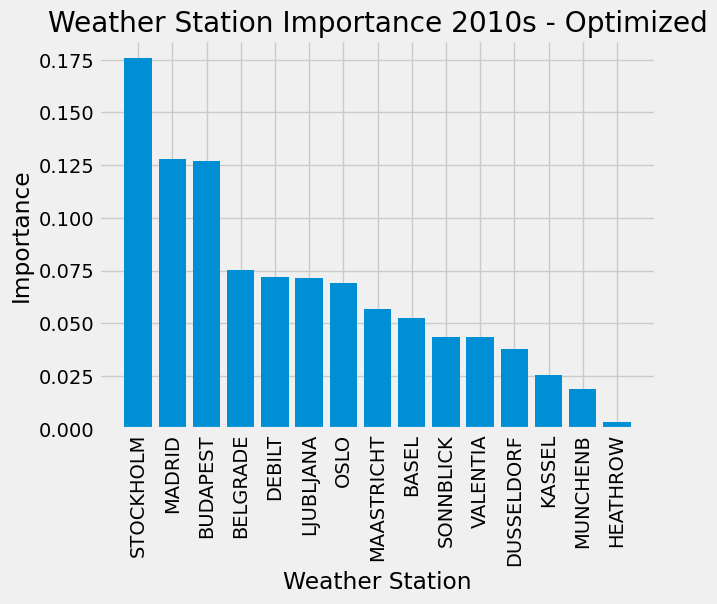

In [179]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
print(unique_stations_list)

plt.bar(df_importance['Weather Station'], df_importance['Importance'], orientation = 'vertical')
plt.xticks(rotation='vertical')
plt.xlabel('Weather Station')
plt.ylabel('Importance')
plt.title('Weather Station Importance 2010s - Optimized')

plt.savefig(os.path.join(path, 'optimized_2010s_feauture_importances.png'), bbox_inches='tight')

plt.show()